In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [555]:
df = pd.read_csv('Healthcare-Diabetes.csv')
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [556]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [557]:
df[df['Insulin'] == 0][['Glucose', 'Outcome']].describe()

,Glucose,Outcome
count,1330.000000,1330.000000
mean,119.427068,0.364662
std,32.837487,0.481516
min,0.000000,0.000000
25%,99.000000,0.000000
50%,115.000000,0.000000
75%,138.000000,1.000000
max,199.000000,1.000000


In [558]:
df['Insulin'].replace(0, np.nan, inplace=True)

C:\Users\elora\AppData\Local\Temp\ipykernel_3384\855868683.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Insulin'].replace(0, np.nan, inplace=True)


In [559]:
missing_insulin = df['Insulin'].isna().sum()
print(f"Missing Insulin values: {missing_insulin}")


Missing Insulin values: 1330


In [561]:
from sklearn.impute import KNNImputer # This will fill in insulin using values from similar rows

imputer = KNNImputer(n_neighbors=5)
features = df.columns[df.columns != 'Outcome']
df[features] = imputer.fit_transform(df[features])


In [563]:
missing_insulin = df['Insulin'].isna().sum()
print(f"Missing Insulin values: {missing_insulin}")

Missing Insulin values: 0


In [564]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,149.064090,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,94.241515,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,87.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,129.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,185.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [565]:
df.duplicated().sum()

np.int64(0)

In [566]:
df.corr()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Id,1.000000,-0.024222,0.015010,0.009717,0.017702,0.002543,0.024007,-0.009695,-0.007404,-0.006298
Pregnancies,-0.024222,1.000000,0.122839,0.147253,-0.068673,0.072902,0.018761,-0.027731,0.540805,0.223796
Glucose,0.015010,0.122839,1.000000,0.142095,0.061023,0.597217,0.225308,0.127195,0.256958,0.460644
BloodPressure,0.009717,0.147253,0.142095,1.000000,0.201167,0.103100,0.281560,0.048471,0.238684,0.072900
SkinThickness,0.017702,-0.068673,0.061023,0.201167,1.000000,0.129448,0.393494,0.179830,-0.111895,0.075603
Insulin,0.002543,0.072902,0.597217,0.103100,0.129448,1.000000,0.241038,0.117933,0.160032,0.309207
BMI,0.024007,0.018761,0.225308,0.281560,0.393494,0.241038,1.000000,0.129766,0.038175,0.280928
DiabetesPedigreeFunction,-0.009695,-0.027731,0.127195,0.048471,0.179830,0.117933,0.129766,1.000000,0.028544,0.160664
Age,-0.007404,0.540805,0.256958,0.238684,-0.111895,0.160032,0.038175,0.028544,1.000000,0.237050
Outcome,-0.006298,0.223796,0.460644,0.072900,0.075603,0.309207,0.280928,0.160664,0.237050,1.000000


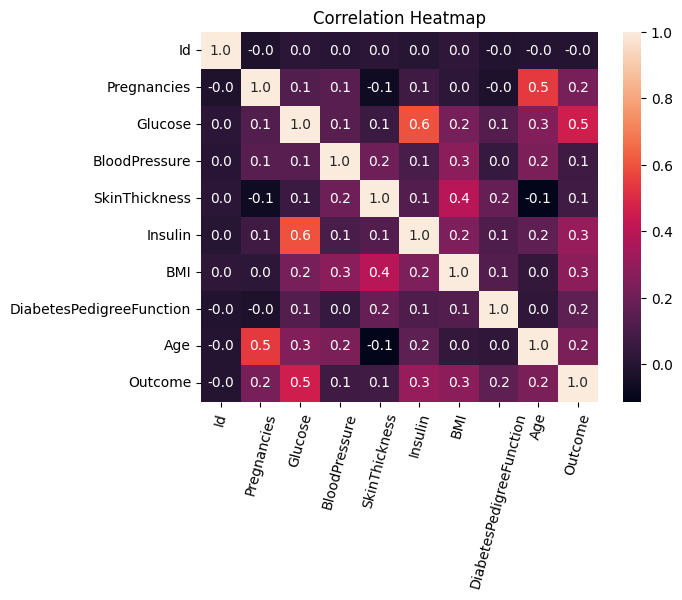

In [567]:
sns.heatmap(df.corr(), annot=True, fmt=".1f")
plt.xticks(rotation=75)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\elora\AppData\Local\Temp\ipykernel_3384\3350183556.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot (x='Outcome',data=df,palette=['b','r'])


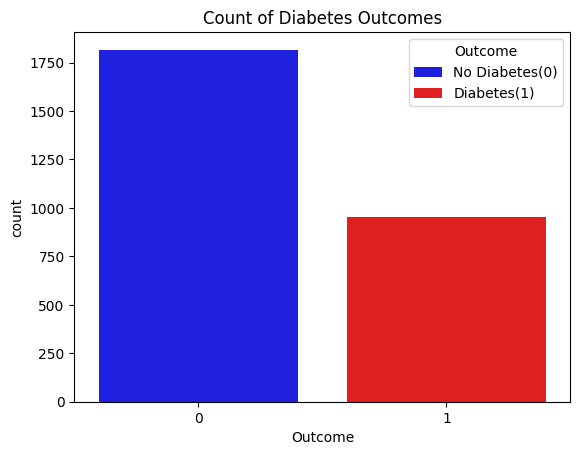

In [568]:
sns.countplot (x='Outcome',data=df,palette=['b','r'])
plt.title('Count of Diabetes Outcomes')
plt.legend(title='Outcome', labels=['No Diabetes(0)', 'Diabetes(1)'])
plt.show()

In [569]:
X = df.drop(['Outcome', 'Pregnancies'], axis=1)
y = df['Outcome']

In [570]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [571]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [594]:
# 1. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Decision Tree Precision:", precision_score(y_test, dt_pred))

Decision Tree Accuracy: 0.983754512635379
Decision Tree Precision: 0.9840425531914894


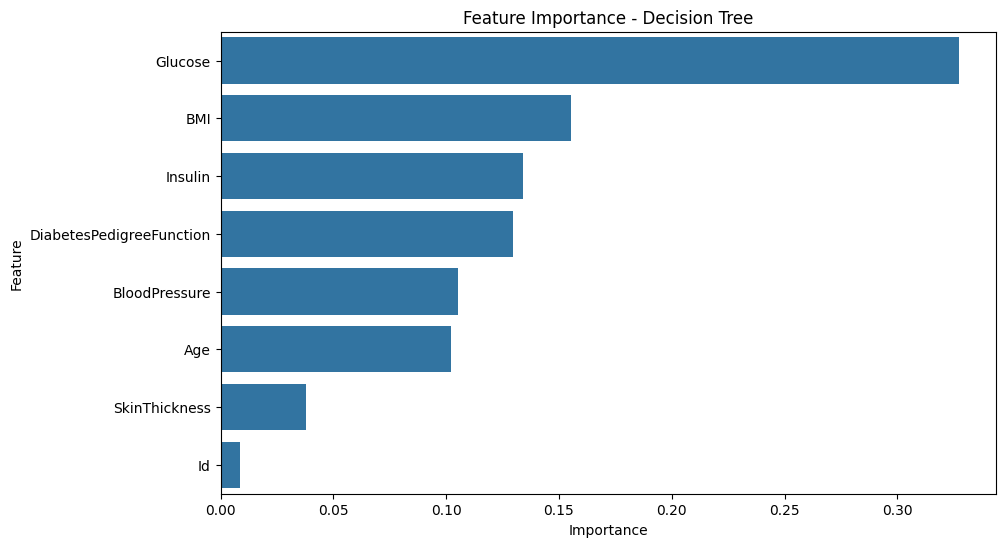

In [573]:
# Feature importance for Decision Tree
feat_names = X.columns
feature_importance = dt.feature_importances_
importance_df = pd.DataFrame({'Feature': feat_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance - Decision Tree')
plt.show()


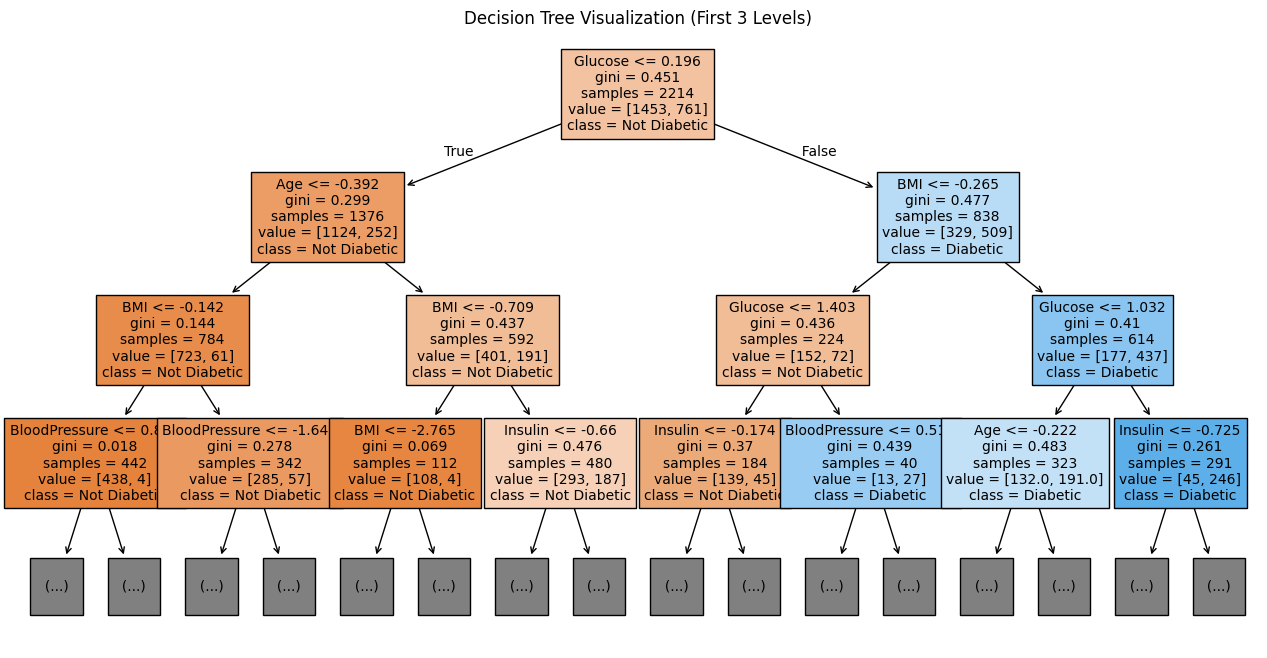

In [574]:
plt.figure(figsize=(16, 8))
plot_tree(
    dt,
    feature_names=feat_names,
    class_names=["Not Diabetic", "Diabetic"],
    filled=True,
    max_depth=3,
    fontsize=10
)
plt.title('Decision Tree Visualization (First 3 Levels)')
plt.show()


In [593]:
# 2. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Precision:", precision_score(y_test, rf_pred))

Random Forest Accuracy: 0.9891696750902527
Random Forest Precision: 0.9842931937172775


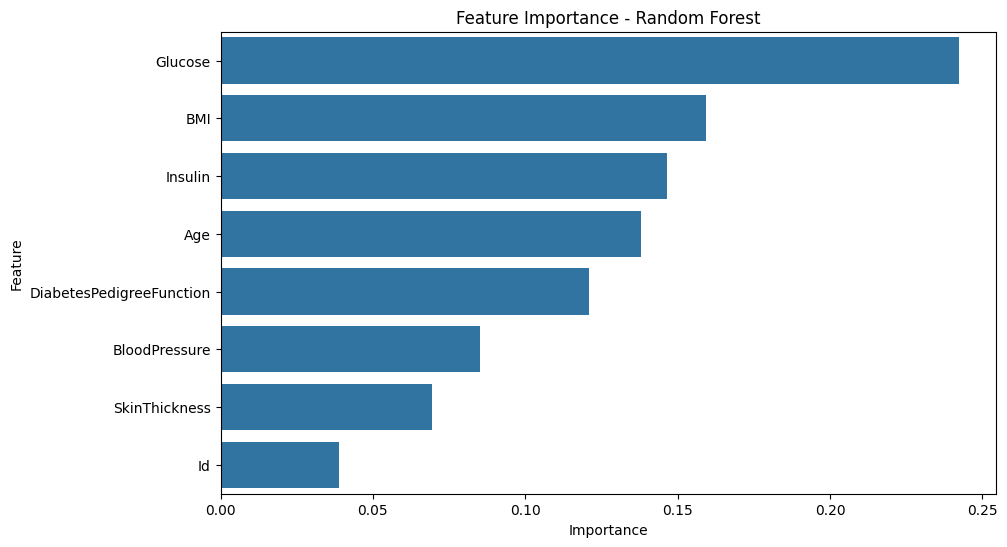

In [576]:
# Feature importance for Random Forest
feature_importance = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance - Random Forest')
plt.show()


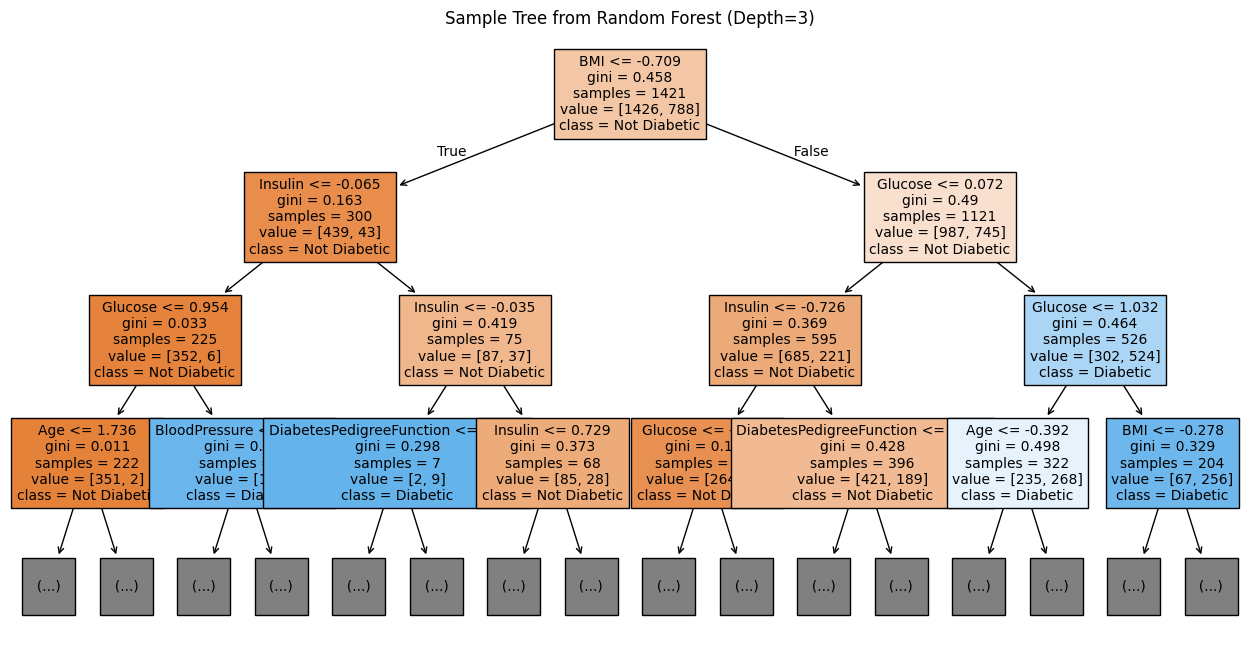

In [577]:
plt.figure(figsize=(16, 8))
plot_tree(rf.estimators_[0],  # first tree
          feature_names=feat_names,
          class_names=["Not Diabetic", "Diabetic"],
          filled=True,
          max_depth=3,  
          fontsize=10)
plt.title("Sample Tree from Random Forest (Depth=3)")
plt.show()

In [618]:
# 3. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("KNN Recall:", recall_score(y_test, knn_pred))

KNN Accuracy: 0.8790613718411552
KNN Recall: 0.8586387434554974


In [598]:
# Hyperparameter tuning for KNN
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_scaled, y_train)

# Best model and prediction
best_knn = grid_search.best_estimator_
best_knn_pred = best_knn.predict(X_test_scaled)

# Results
print("Best parameters:", grid_search.best_params_)
print('----------------------------------')
print("Best F1 Score (CV):", grid_search.best_score_)
print('----------------------------------')
print("Tuned KNN Accuracy:", accuracy_score(y_test, best_knn_pred))
print('----------------------------------')
print("Tuned KNN Precision:", precision_score(y_test, best_knn_pred))
print('----------------------------------')
print("Tuned KNN Recall:", recall_score(y_test, best_knn_pred))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
----------------------------------
Best F1 Score (CV): 0.9330251247817817
----------------------------------
Tuned KNN Accuracy: 0.9693140794223827
----------------------------------
Tuned KNN Precision: 0.9484536082474226
----------------------------------
Tuned KNN Recall: 0.9633507853403142


In [599]:
# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='f1_macro', n_jobs=-1)
grid_dt.fit(X_train_scaled, y_train)

best_dt = grid_dt.best_estimator_
best_dt_pred = best_dt.predict(X_test_scaled)

print("Best Decision Tree Params:", grid_dt.best_params_)
print('----------------------------------')
print("Best Decision Tree F1 Score (CV):", grid_dt.best_score_)
print('----------------------------------')
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, best_dt_pred))
print('----------------------------------')
print("Tuned Decision Tree Precision:", precision_score(y_test, best_dt_pred))
print('----------------------------------')
print("Tuned Decision Tree Recall:", recall_score(y_test, best_dt_pred))

Best Decision Tree Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
----------------------------------
Best Decision Tree F1 Score (CV): 0.9563424860434362
----------------------------------
Tuned Decision Tree Accuracy: 0.983754512635379
----------------------------------
Tuned Decision Tree Precision: 0.9840425531914894
----------------------------------
Tuned Decision Tree Recall: 0.9685863874345549


In [600]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_macro', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

best_rf = grid_rf.best_estimator_
best_rf_pred = best_rf.predict(X_test_scaled)

print("Best Random Forest Params:", grid_rf.best_params_)
print('----------------------------------')
print("Best Random Forest F1 Score (CV):", grid_rf.best_score_)
print('----------------------------------')
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, best_rf_pred))
print('----------------------------------')
print("Tuned Random Forest Precision:", precision_score(y_test, best_rf_pred))
print('----------------------------------')
print("Tuned Random Forest Recall:", recall_score(y_test, best_rf_pred))

Best Random Forest Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
----------------------------------
Best Random Forest F1 Score (CV): 0.9645754063744076
----------------------------------
Tuned Random Forest Accuracy: 0.9873646209386282
----------------------------------
Tuned Random Forest Precision: 0.9791666666666666
----------------------------------
Tuned Random Forest Recall: 0.9842931937172775


C:\Users\elora\AppData\Local\Temp\ipykernel_3384\2255828232.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')


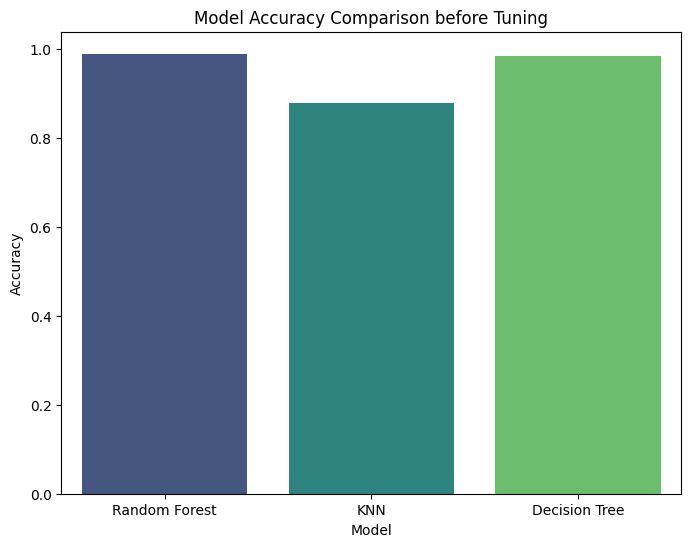

In [603]:
# Accuracy comparison for all models before tuning
accuracies = {
    "Random Forest": accuracy_score(y_test, rf_pred),
    "KNN": accuracy_score(y_test, knn_pred),
    "Decision Tree": accuracy_score(y_test, dt_pred),
}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.title('Model Accuracy Comparison before Tuning')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


C:\Users\elora\AppData\Local\Temp\ipykernel_3384\29845866.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='mako')


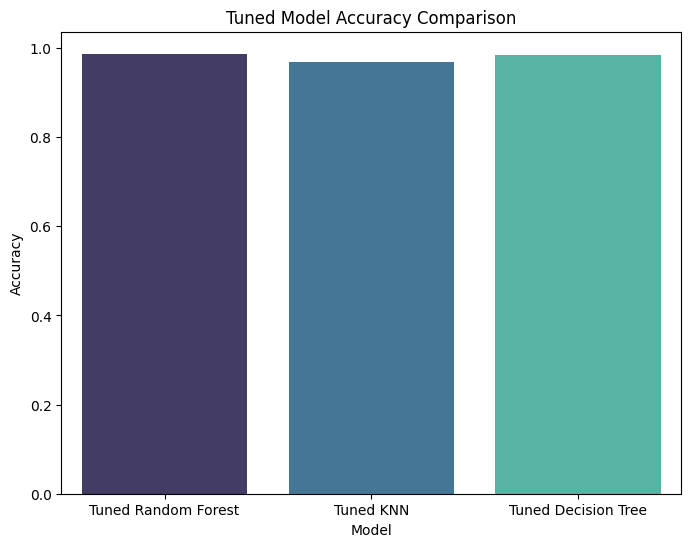

In [604]:
# Accuracy comparison for all models after tuning
accuracies = {
    "Tuned Random Forest": accuracy_score(y_test, best_rf_pred),
    "Tuned KNN": accuracy_score(y_test, best_knn_pred),
    "Tuned Decision Tree": accuracy_score(y_test, best_dt_pred)
}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='mako')
plt.title('Tuned Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


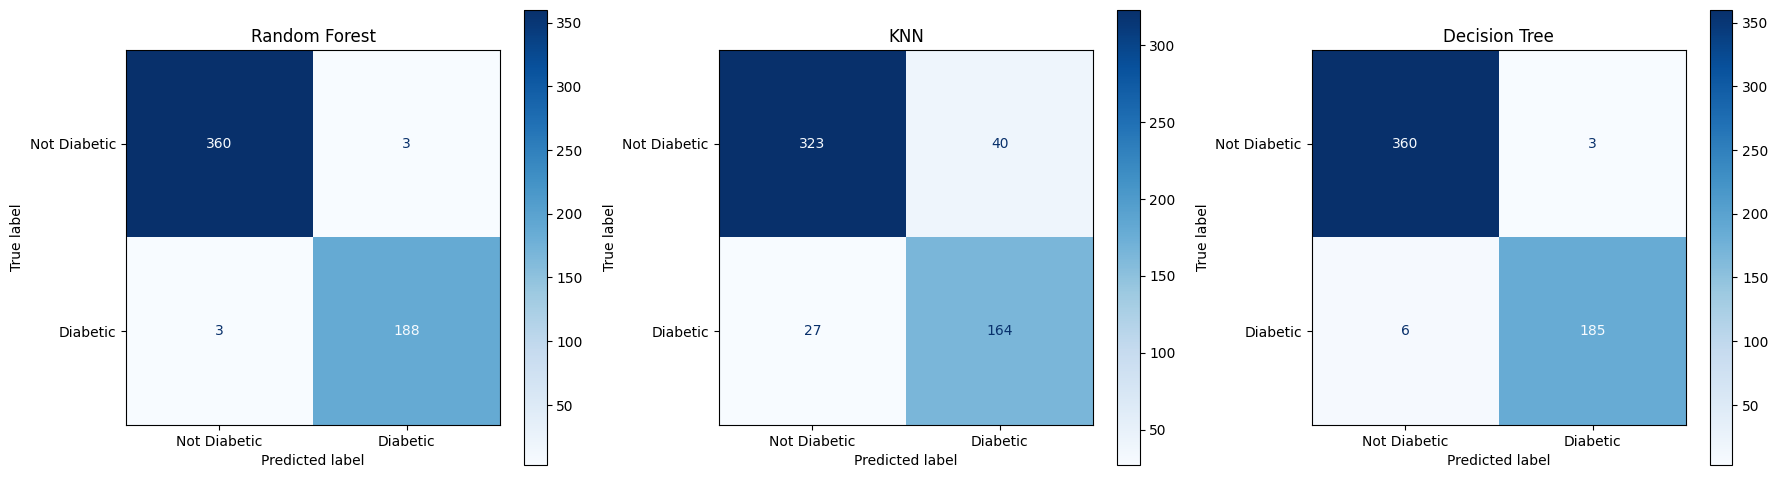

In [619]:
# Confusion Matrices for all models before tuning
tuned_models_preds = {
    "Random Forest": rf_pred,
    "KNN": knn_pred,
    "Decision Tree": dt_pred
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

for ax, (name, preds) in zip(axes, tuned_models_preds.items()):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, preds,
        display_labels=["Not Diabetic", "Diabetic"],
        ax=ax,
        cmap='Blues'
    )
    ax.set_title(name)

plt.tight_layout()
plt.show()


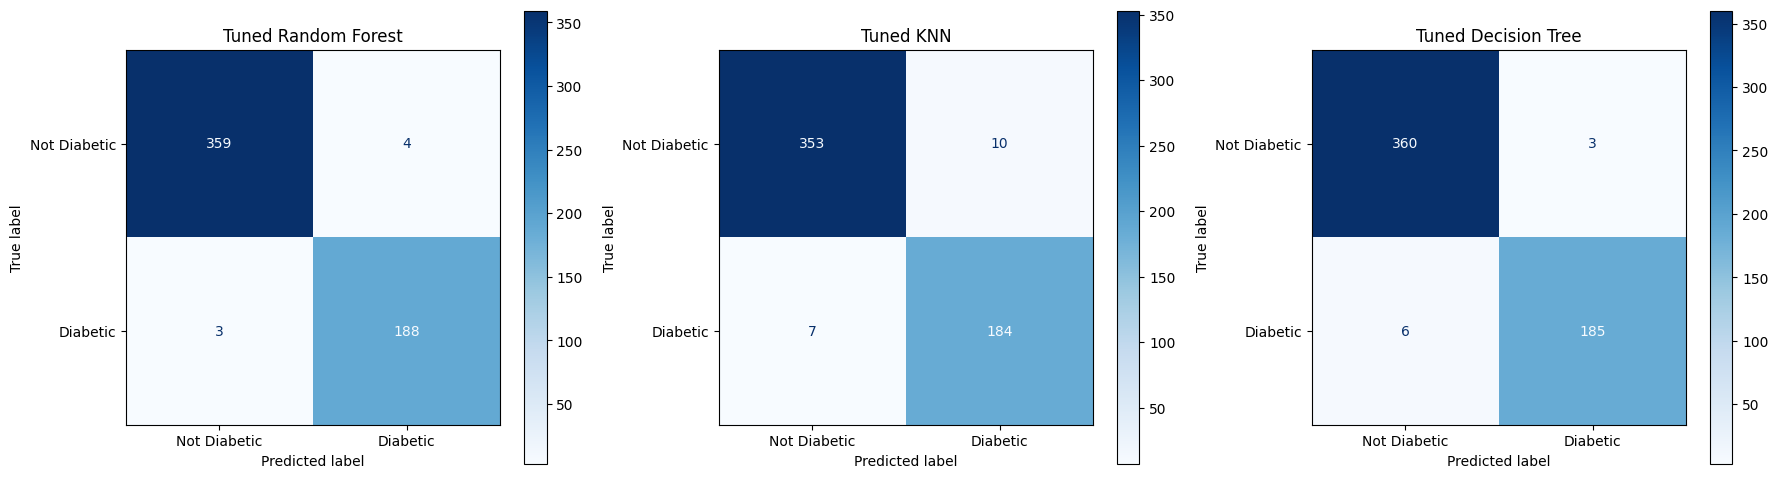

In [620]:
# Confusion Matrices for all models after tuning
tuned_models_preds = {
    "Tuned Random Forest": best_rf_pred,
    "Tuned KNN": best_knn_pred,
    "Tuned Decision Tree": best_dt_pred
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

for ax, (name, preds) in zip(axes, tuned_models_preds.items()):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, preds,
        display_labels=["Not Diabetic", "Diabetic"],
        ax=ax,
        cmap='Blues'
    )
    ax.set_title(name)

plt.tight_layout()
plt.show()

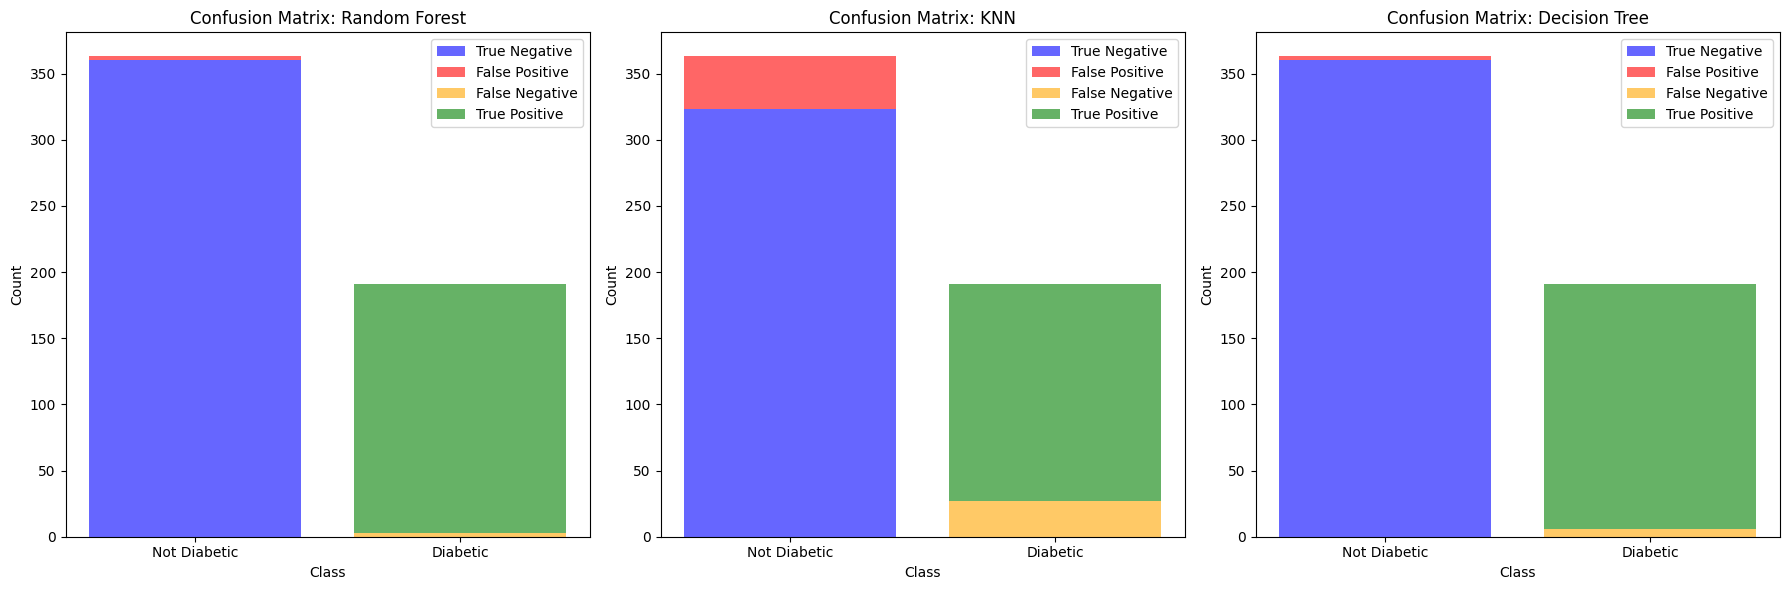

In [621]:
from sklearn.metrics import confusion_matrix

tuned_models = {
    "Random Forest": rf_pred,
    "KNN": knn_pred,
    "Decision Tree": dt_pred,
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

labels = ["Not Diabetic", "Diabetic"]

for i, (name, preds) in enumerate(tuned_models.items()):
    cm = confusion_matrix(y_test, preds)
    tn, fp, fn, tp = cm.ravel()

    axes[i].bar(labels[0], tn, label='True Negative', color='blue', alpha=0.6)
    axes[i].bar(labels[0], fp, bottom=tn, label='False Positive', color='red', alpha=0.6)
    axes[i].bar(labels[1], fn, label='False Negative', color='orange', alpha=0.6)
    axes[i].bar(labels[1], tp, bottom=fn, label='True Positive', color='green', alpha=0.6)

    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('Class')
    axes[i].legend()

plt.tight_layout()
plt.show()


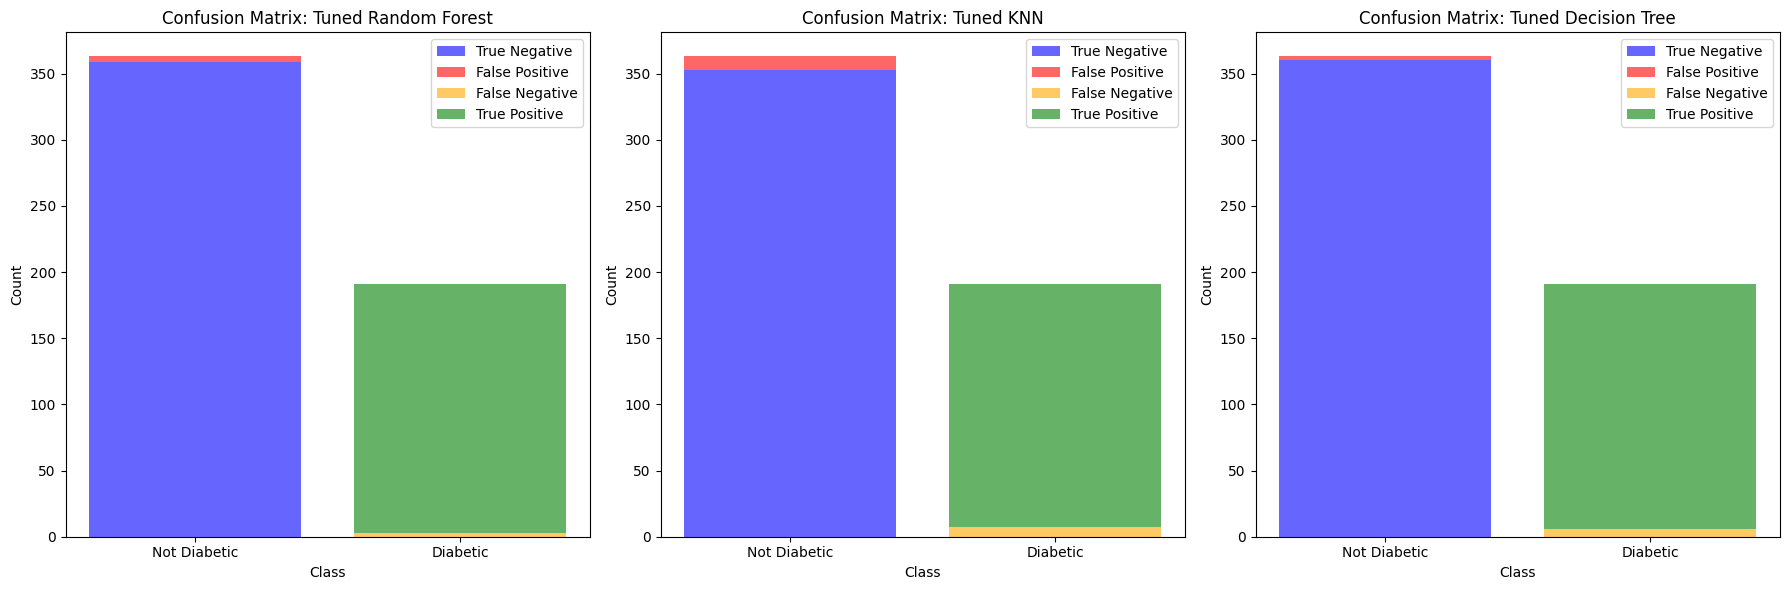

In [622]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()
labels = ["Not Diabetic", "Diabetic"]

for i, (name, preds) in enumerate(tuned_models_preds.items()):
    cm = confusion_matrix(y_test, preds)
    tn, fp, fn, tp = cm.ravel()
    
    axes[i].bar(labels[0], tn, label='True Negative', color='blue', alpha=0.6)
    axes[i].bar(labels[0], fp, bottom=tn, label='False Positive', color='red', alpha=0.6)
    axes[i].bar(labels[1], fn, label='False Negative', color='orange', alpha=0.6)
    axes[i].bar(labels[1], tp, bottom=fn, label='True Positive', color='green', alpha=0.6)

    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('Class')
    axes[i].legend()

plt.tight_layout()
plt.show()


In [ ]:
# Automatically set 'Id' as the next available integer
new_id = df['Id'].max() + 1 if 'Id' in df.columns else 1
input_data = {'Id': new_id}

print("Enter new patient data to test all models:")
for feature in X.columns:
    if feature.lower() != 'id':
        while True:
            val = input(f"{feature}: ").strip()
            if val == '':
                print("Input cannot be empty. Please enter a number.")
            else:
                try:
                    input_data[feature] = float(val)
                    break
                except ValueError:
                    print("Invalid input. Please enter a numeric value.")

test_input_df = pd.DataFrame([input_data])
test_input_df = test_input_df[X.columns]  # Ensure correct column order

test_input_scaled = scaler.transform(test_input_df)

models = {
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "KNN": best_knn
}

print("\nModel Predictions:")
for name, model in models.items():
    prediction = model.predict(test_input_scaled)[0]
    print(f"{name}: {'Diabetic' if prediction == 1 else 'Non-Diabetic'}")



Enter new patient data to test all models:

Model Predictions:
Decision Tree: Non-Diabetic
Random Forest: Non-Diabetic
KNN: Non-Diabetic
